In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
#import matplotlib.cbook as cbook
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as stats
import gmaps
import os

# Read clean csv files into DataFrames
age_of_inventory_df = pd.read_csv(r'clean_csv_files\age_of_inventory_c.csv')
days_on_zillow_df = pd.read_csv(r'clean_csv_files\days_on_zillow_c.csv')

median_price_reduction_df = pd.read_csv(r'clean_csv_files\median_price_reduction_c.csv')
median_sale_price_df = pd.read_csv(r'clean_csv_files\median_sale_price_c.csv') 
monthly_home_sales_df = pd.read_csv(r'clean_csv_files\monthly_home_sales_c.csv') 

monthly_market_value_df = pd.read_csv(r'clean_csv_files\monthly_market_value_c.csv') 
new_monthly_listings_df = pd.read_csv(r'clean_csv_files\new_monthly_listings_c.csv') 

t_test_df = pd.read_csv(r'clean_csv_files\t_test.csv') 
tt_storms = pd.read_csv(r'clean_csv_files\tt_storms.csv') 

age_of_inventory_df 


,RegionName,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,United States,104.0,102.0,86.0,68.0,62.0,64.0,69.0,72.0,77.0,81.0,85.0,92.0
1,"Houston, TX",93.0,88.0,67.0,56.0,55.0,62.0,64.0,70.0,83.0,88.0,90.0,89.0


In [4]:
# Create data for T test
# Transpose DataFrame
tt = t_test_df.T
tt = tt.iloc[1:85]

tts = tt_storms.T
tts = tts.iloc[1:85]
# Reset index and rename columns
tt = tt.reset_index()
tt = tt.rename(columns = {0:"Houston", "index":"Year-Month"})

tts = tts.reset_index()
tts = tts.rename(columns = {0:"Storms", "index":"Year-Month"})

# Define input T test data
hou_data = tt["Houston"] # Population
storm_data = tts["Storms"] # Sample


In [5]:
# Generate some fake data to test with
def gendata(loc=0):
    population = hou_data   
    sample = storm_data      

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population)), population, label="population")
    plt.scatter(range(len(sample)), sample, label="sample")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population, 20, density=True, alpha=0.7, label="population")
    plt.hist(sample, 20, density=True, alpha=0.7, label="sample")
    plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    plt.savefig('output_plots/T test.png')
    return population, sample
   

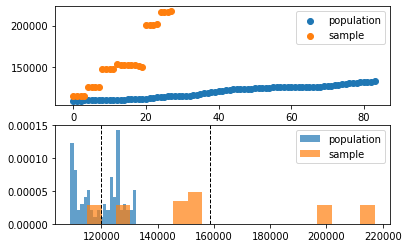

In [6]:
# Generate some data and show the scatter plot
population, sample = gendata()

In [7]:
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=5.836962023005194, pvalue=3.2545553006644234e-06)

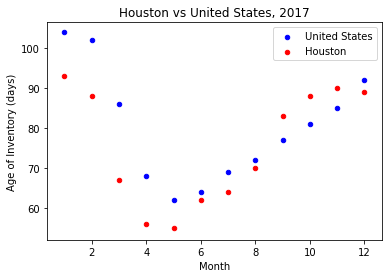

In [8]:
# Create scatter plot for Age of Inventory
# Transpose DataFrame
aoi = age_of_inventory_df.T
aoi = aoi.iloc[1:85]
# Reset index and rename columns
aoi = aoi.reset_index()
aoi = aoi.rename(columns = {0:"United States", 1:"Houston", "index":"Year-Month"})
# Create dataframe of months using numeral designation (scatter plots will not accept non-numeric value)
df1 = pd.DataFrame({"Month":[1,2,3,4,5,6,7,8,9,10,11,12]})
# Append dataframes 
aoi = pd.concat([df1,aoi], axis=1)

aoi["United States"] = pd.to_numeric(aoi["United States"])
aoi["Houston"] = pd.to_numeric(aoi["Houston"])

ax=aoi.plot(kind='scatter',x='Month',y="United States",label='United States',color='blue')
aoi.plot(kind='scatter',x='Month',y="Houston",label='Houston',color='red', \
    ax=ax,secondary_y=True)
plt.title('Houston vs United States, 2017')
plt.xlabel('Month')
plt.ylabel('Age of Inventory (days)')

# Save plot to a file
plt.savefig('output_plots/Age_of_Inv_scat.png')
plt.show()

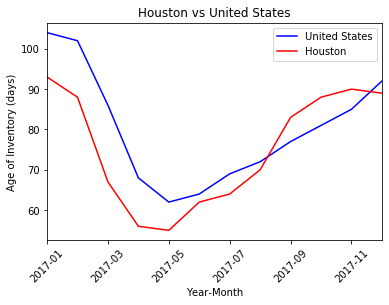

In [9]:
# Create line graph for Age of Inventory
ax=aoi.plot(kind='line',x='Year-Month',y="United States",label='United States',color='blue')
aoi.plot(kind='line',x='Year-Month',y="Houston",label='Houston',color='red', \
    ax=ax,secondary_y=False)
plt.title('Houston vs United States')
plt.xlabel('Year-Month')
plt.ylabel('Age of Inventory (days)') 
degrees = 45
plt.xticks(rotation=degrees)
# Save plot to a file
plt.savefig('output_plots/Age_of_Inv_line.png')
plt.show()

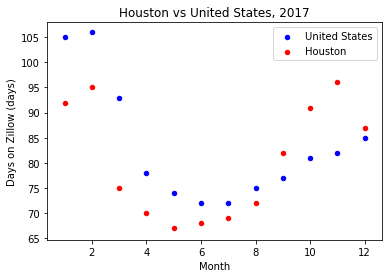

In [10]:
# Transpose DataFrame
doz = days_on_zillow_df.T
doz = doz.iloc[1:85]
# Reset index and rename columns
doz = doz.reset_index()
doz = doz.rename(columns = {0:"United States", 1:"Houston", "index":"Year-Month"})

# Define axes
#labels = aoi["Year-Month"]
#us_data = aoi["United States"]
#hou_data = aoi["Houston"]

# Create scatter plot for Days on Zillow
# Create dataframe of months using numeral designation (scatter plots will not accept non-numeric value)
df1 = pd.DataFrame({"Month":[1,2,3,4,5,6,7,8,9,10,11,12]})
# Append dataframes 
doz = pd.concat([df1,doz], axis=1)

doz["United States"] = pd.to_numeric(doz["United States"])
doz["Houston"] = pd.to_numeric(doz["Houston"])

ax=doz.plot(kind='scatter',x='Month',y="United States",label='United States',color='blue')
doz.plot(kind='scatter',x='Month',y="Houston",label='Houston',color='red', \
    ax=ax,secondary_y=True)
plt.title('Houston vs United States, 2017')
plt.xlabel('Month')
plt.ylabel('Days on Zillow (days)')

# Save plot to a file
plt.savefig('output_plots/Days_on_Zil_scat.png')
plt.show()

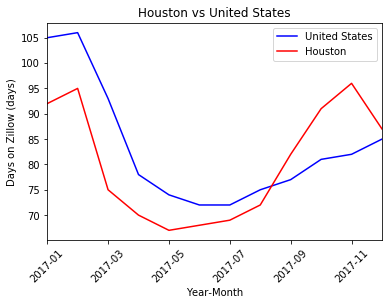

In [11]:
# Create line graph for Days 0n Zillow
ax=doz.plot(kind='line',x='Year-Month',y="United States",label='United States',color='blue')
doz.plot(kind='line',x='Year-Month',y="Houston",label='Houston',color='red', \
    ax=ax,secondary_y=False)
plt.title('Houston vs United States')
plt.xlabel('Year-Month')
plt.ylabel('Days on Zillow (days)') 
degrees = 45
plt.xticks(rotation=degrees)
# Save plot to a file
plt.savefig('output_plots/Days_on_Zil_line.png')
plt.show()

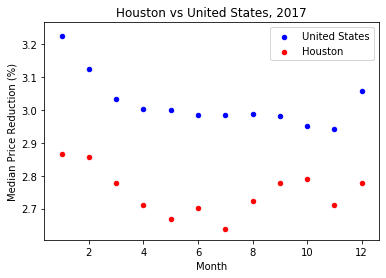

In [12]:
# Transpose DataFrame
mpr = median_price_reduction_df.T
mpr = mpr.iloc[1:85]
# Reset index and rename columns
mpr = mpr.reset_index()
mpr = mpr.rename(columns = {0:"United States", 1:"Houston", "index":"Year-Month"})

# Define axes
#labels = aoi["Year-Month"]
#us_data = aoi["United States"]
#hou_data = aoi["Houston"]

# Create scatter plot for Median Price Reduction
# Create dataframe of months using numeral designation (scatter plots will not accept non-numeric value)
df1 = pd.DataFrame({"Month":[1,2,3,4,5,6,7,8,9,10,11,12]})
# Append dataframes 
mpr = pd.concat([df1,mpr], axis=1)

mpr["United States"] = pd.to_numeric(mpr["United States"])
mpr["Houston"] = pd.to_numeric(mpr["Houston"])

ax=mpr.plot(kind='scatter',x='Month',y="United States",label='United States',color='blue')
mpr.plot(kind='scatter',x='Month',y="Houston",label='Houston',color='red', \
    ax=ax,secondary_y=True)
plt.title('Houston vs United States, 2017')
plt.xlabel('Month')
plt.ylabel('Median Price Reduction (%)')

# Save plot to a file
plt.savefig('output_plots/Med_Price_Red_scat.png')
plt.show()

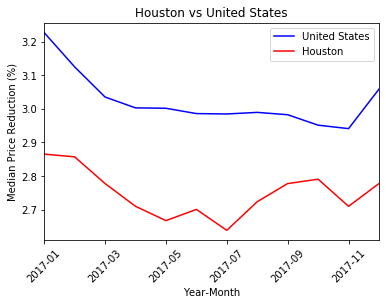

In [13]:
# Create line graph for Median Price Reduction
ax=mpr.plot(kind='line',x='Year-Month',y="United States",label='United States',color='blue')
mpr.plot(kind='line',x='Year-Month',y="Houston",label='Houston',color='red', \
    ax=ax,secondary_y=False)
plt.title('Houston vs United States')
plt.xlabel('Year-Month')
plt.ylabel('Median Price Reduction (%)') 
degrees = 45
plt.xticks(rotation=degrees)
# Save plot to a file
plt.savefig('output_plots/Med_Price_Red_line.png')
plt.show()

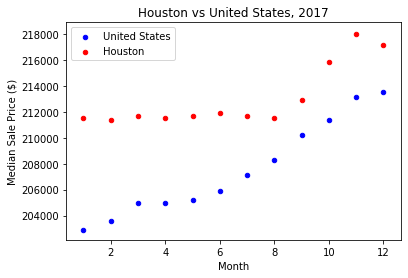

In [14]:
# Transpose DataFrame
msp = median_sale_price_df.T
msp = msp.iloc[1:85]
# Reset index and rename columns
msp = msp.reset_index()
msp = msp.rename(columns = {0:"United States", 1:"Houston", "index":"Year-Month"})

# Define axes
#labels = aoi["Year-Month"]
#us_data = aoi["United States"]
#hou_data = aoi["Houston"]

# Create scatter plot for Median Sales Price
# Create dataframe of months using numeral designation (scatter plots will not accept non-numeric value)
df1 = pd.DataFrame({"Month":[1,2,3,4,5,6,7,8,9,10,11,12]})
# Append dataframes 
msp = pd.concat([df1,msp], axis=1)

msp["United States"] = pd.to_numeric(msp["United States"])
msp["Houston"] = pd.to_numeric(msp["Houston"])

ax=msp.plot(kind='scatter',x='Month',y="United States",label='United States',color='blue')
msp.plot(kind='scatter',x='Month',y="Houston",label='Houston',color='red', \
    ax=ax,secondary_y=True)
plt.title('Houston vs United States, 2017')
plt.xlabel('Month')
plt.ylabel('Median Sale Price ($)')

# Save plot to a file
plt.savefig('output_plots/Med_Sale_Price_scat.png')
plt.show()

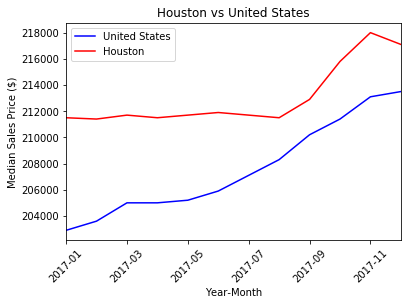

In [15]:
# Create line graph for Median Sales Price
ax=msp.plot(kind='line',x='Year-Month',y="United States",label='United States',color='blue')
msp.plot(kind='line',x='Year-Month',y="Houston",label='Houston',color='red', \
    ax=ax,secondary_y=False)
plt.title('Houston vs United States')
plt.xlabel('Year-Month')
plt.ylabel('Median Sales Price ($)') 
degrees = 45
plt.xticks(rotation=degrees)
# Save plot to a file
plt.savefig('output_plots/Med_Sale_Price_line.png')
plt.show()

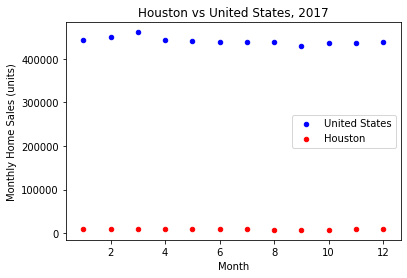

In [16]:
# Transpose DataFrame
mhs = monthly_home_sales_df.T
mhs = mhs.iloc[1:85]
# Reset index and rename columns
mhs = mhs.reset_index()
mhs = mhs.rename(columns = {0:"United States", 1:"Houston", "index":"Year-Month"})

# Define axes
#labels = aoi["Year-Month"]
#us_data = aoi["United States"]
#hou_data = aoi["Houston"]

# Create scatter plot for Monthly Home Sales
# Create dataframe of months using numeral designation (scatter plots will not accept non-numeric value)
df1 = pd.DataFrame({"Month":[1,2,3,4,5,6,7,8,9,10,11,12]})
# Append dataframes 
mhs = pd.concat([df1,mhs], axis=1)

mhs["United States"] = pd.to_numeric(mhs["United States"])
mhs["Houston"] = pd.to_numeric(mhs["Houston"])

ax=mhs.plot(kind='scatter',x='Month',y="United States",label='United States',color='blue')
mhs.plot(kind='scatter',x='Month',y="Houston",label='Houston',color='red', \
    ax=ax,secondary_y=True)
plt.title('Houston vs United States, 2017')
plt.xlabel('Month')
plt.ylabel('Monthly Home Sales (units)')

# Save plot to a file
plt.savefig('output_plots/Mon_Home_Sales_scat.png')
plt.show()

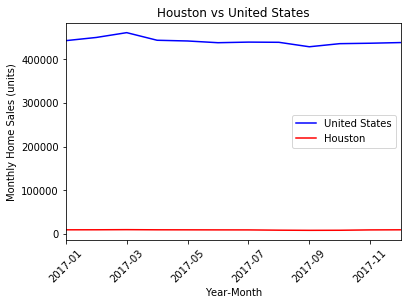

In [17]:
# Create line graph for Monthly Home Sales
ax=mhs.plot(kind='line',x='Year-Month',y="United States",label='United States',color='blue')
mhs.plot(kind='line',x='Year-Month',y="Houston",label='Houston',color='red', \
    ax=ax,secondary_y=False)
plt.title('Houston vs United States')
plt.xlabel('Year-Month')
plt.ylabel('Monthly Home Sales (units)') 
degrees = 45
plt.xticks(rotation=degrees)
# Save plot to a file
plt.savefig('output_plots/Mon_Home_Sales_line.png')
plt.show()

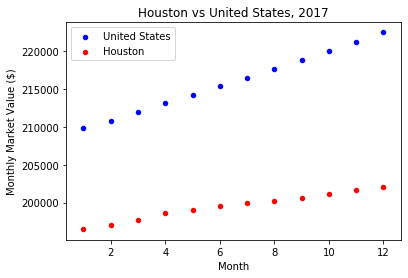

In [18]:
# Transpose DataFrame
mmv = monthly_market_value_df.T
mmv = mmv.iloc[1:85]
# Reset index and rename columns
mmv = mmv.reset_index()
mmv = mmv.rename(columns = {0:"United States", 1:"Houston", "index":"Year-Month"})

# Define axes
#labels = aoi["Year-Month"]
#us_data = aoi["United States"]
#hou_data = aoi["Houston"]

# Create scatter plot for Monthly Market Value
# Create dataframe of months using numeral designation (scatter plots will not accept non-numeric value)
df1 = pd.DataFrame({"Month":[1,2,3,4,5,6,7,8,9,10,11,12]})
# Append dataframes 
mmv = pd.concat([df1,mmv], axis=1)

mmv["United States"] = pd.to_numeric(mmv["United States"])
mmv["Houston"] = pd.to_numeric(mmv["Houston"])

ax=mmv.plot(kind='scatter',x='Month',y="United States",label='United States',color='blue')
mmv.plot(kind='scatter',x='Month',y="Houston",label='Houston',color='red', \
    ax=ax,secondary_y=True)
plt.title('Houston vs United States, 2017')
plt.xlabel('Month')
plt.ylabel('Monthly Market Value ($)')

# Save plot to a file
plt.savefig('output_plots/Mon_Market_Value_scat.png')
plt.show()

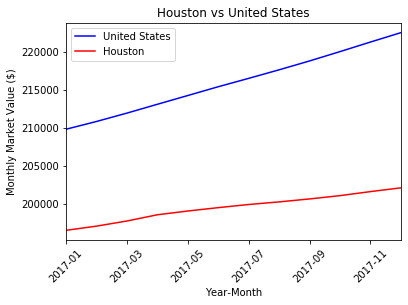

In [19]:
# Create line graph for Monthly Market Value
ax=mmv.plot(kind='line',x='Year-Month',y="United States",label='United States',color='blue')
mmv.plot(kind='line',x='Year-Month',y="Houston",label='Houston',color='red', \
    ax=ax,secondary_y=False)
plt.title('Houston vs United States')
plt.xlabel('Year-Month')
plt.ylabel('Monthly Market Value ($)') 
degrees = 45
plt.xticks(rotation=degrees)
# Save plot to a file
plt.savefig('output_plots/Mon_Market_Value_line.png')
plt.show()

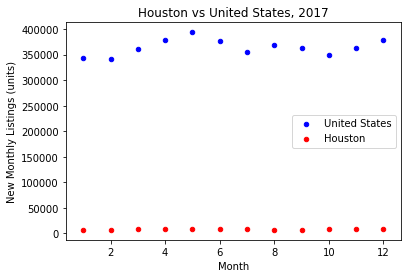

In [20]:
# Transpose DataFrame
nml = new_monthly_listings_df.T
nml = nml.iloc[1:85]
# Reset index and rename columns
nml = nml.reset_index()
nml = nml.rename(columns = {0:"United States", 1:"Houston", "index":"Year-Month"})

# Define axes
#labels = aoi["Year-Month"]
#us_data = aoi["United States"]
#hou_data = aoi["Houston"]

# Create scatter plot for New Monthly Listings
# Create dataframe of months using numeral designation (scatter plots will not accept non-numeric value)
df1 = pd.DataFrame({"Month":[1,2,3,4,5,6,7,8,9,10,11,12]})
# Append dataframes 
nml = pd.concat([df1,nml], axis=1)

nml["United States"] = pd.to_numeric(nml["United States"])
nml["Houston"] = pd.to_numeric(nml["Houston"])

ax=nml.plot(kind='scatter',x='Month',y="United States",label='United States',color='blue')
nml.plot(kind='scatter',x='Month',y="Houston",label='Houston',color='red', \
    ax=ax,secondary_y=True)
plt.title('Houston vs United States, 2017')
plt.xlabel('Month')
plt.ylabel('New Monthly Listings (units)')

# Save plot to a file
plt.savefig('output_plots/New_Mon_Listings_scat.png')
plt.show()

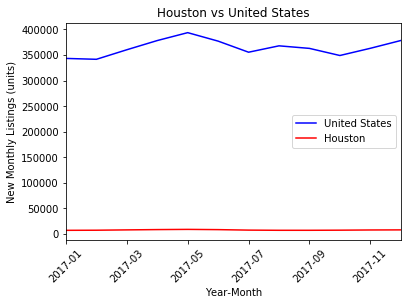

In [21]:
# Create line graph for New Monthly Listings
ax=nml.plot(kind='line',x='Year-Month',y="United States",label='United States',color='blue')
nml.plot(kind='line',x='Year-Month',y="Houston",label='Houston',color='red', \
    ax=ax,secondary_y=False)
plt.title('Houston vs United States')
plt.xlabel('Year-Month')
plt.ylabel('New Monthly Listings (units)') 
degrees = 45
plt.xticks(rotation=degrees)
# Save plot to a file
plt.savefig('output_plots/New_Mon_Listings_line.png')
plt.show()

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt

#import matplotlib.cbook as cbook
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as stats
import gmaps
import os


# Import API key
#from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Input File Path (CSV)
#csv_path = "C:\Users\Lenovo\Desktop\Project_One_2020EKTPHB\csv_files"

# Read clean csv files into DataFrames
age_of_inventory_df = pd.read_csv(r'clean_csv_files\age_of_inventory_c.csv')
days_on_zillow_df = pd.read_csv(r'clean_csv_files\days_on_zillow_c.csv')

median_price_reduction_df = pd.read_csv(r'clean_csv_files\median_price_reduction_c.csv')
median_sale_price_df = pd.read_csv(r'clean_csv_files\median_sale_price_c.csv') 
monthly_home_sales_df = pd.read_csv(r'clean_csv_files\monthly_home_sales_c.csv') 

monthly_market_value_df = pd.read_csv(r'clean_csv_files\monthly_market_value_c.csv') 
new_monthly_listings_df = pd.read_csv(r'clean_csv_files\new_monthly_listings_c.csv') 

age_of_inventory_df 

,RegionName,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,United States,104.0,102.0,86.0,68.0,62.0,64.0,69.0,72.0,77.0,81.0,85.0,92.0
1,"Houston, TX",93.0,88.0,67.0,56.0,55.0,62.0,64.0,70.0,83.0,88.0,90.0,89.0


In [23]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Create dataframe of months using month abbreviation designation for Group Bar Chart 
df1 = pd.DataFrame({"Month":['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']})

# Append dataframes 
aoi = pd.concat([df1,aoi], axis=1)

x = np.arange(len(labels))  # the label locations
width = 0.30  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Houston, width, label='Houston')
rects2 = ax.bar(x + width/2, United_States, width, label='United States')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Age of Inventory By Days on Market')
ax.set_title('2017 Houston vs. United States')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


fig.tight_layout()

plt.show()

NameError: name 'labels' is not defined

In [ ]:
# Save plot to a file
plt.savefig('output_plots/Age_of_Inv_GroupBarChart.png')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create dataframe of months using month abbreviation designation for Bar Chart 
df1 = pd.DataFrame({"Month":['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']})

# Append dataframes 
aoi = pd.concat([df1,aoi], axis=1)

fig, ax = plt.subplots()

ax.bar(labels, Houston, width, label='Houston')
ax.bar(labels, United_States, width, label='United States')

ax.set_ylabel('Age of Inventory by Days on Market')
ax.set_title('2017 Houston vs. United States')
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 3, height),
                    xytext=(0, 3),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
fig.tight_layout()


In [ ]:
# Save plot to a file
plt.savefig('output_plots/Age_of_Inv_RegularBarChart.png')
plt.show()